In [1]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
CSVPATH = "./csv/"
TXTPATH = "./txt/"
IMAGESPATH = "./images/"
files = os.listdir(CSVPATH)

categ = {"pant":0,"skirt":1,"dress":2,"shoes":3,"hat":4,"coat":5,"shirt":6,"pull":7}

In [3]:
def annotation_csv_to_txt():
    for file in files:
        mypd = pd.read_csv(os.path.join(CSVPATH,file))
        for f in mypd.filename.unique():
            root,ext = os.path.splitext(f)
            output = []
            for idx,line in mypd[mypd['filename']==f].iterrows():
                imshape = cv2.imread(os.path.join(IMAGESPATH,line.filename)).shape
                mydict = eval(line.region_shape_attributes)
                mylabeldict = eval(line.region_attributes)
                dwidth = mydict['width'] / imshape[0]
                dheight = mydict['height'] / imshape[1]
                xcenter = (mydict['x']+dwidth/2)/imshape[0]
                ycenter = (mydict['y']+dheight/2)/imshape[1]
                cat = categ[mylabeldict['clothe']]
                output.append([cat,xcenter,ycenter,dwidth,dheight])
            outputf = pd.DataFrame(output)
            outputf.to_csv(os.path.join(TXTPATH,root+".txt"),index=False,header=False,sep=" ")

In [4]:
annotation_csv_to_txt()

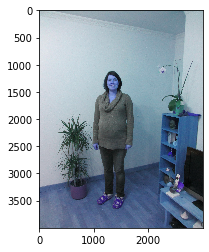

In [10]:
# def checkboxes(filename):
mypd = pd.read_csv(os.path.join(TXTPATH,filename+".txt"),sep=" ",header=None)

image = cv2.imread(os.path.join(IMAGESPATH,filename+".jpg")) 
  
plt.imshow(image) ;

In [6]:
filename = '150121'

In [23]:
mypd

,0,1,2,3,4
0,7,0.370534,0.420376,0.27325,0.256667
1,0,0.624279,0.440699,0.23125,0.196667
2,3,0.839259,0.454366,0.07275,0.198000
